In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

# Read data

In [4]:
df = pd.read_csv('Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.shape

(541909, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Description and CustomerID has alot of null values

In [9]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [10]:
df['CustomerID'].nunique()

4372

- there are total 4372 unique customer

In [11]:
df['InvoiceNo'].nunique()

25900

In [12]:
# central tendency

In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Preprocessing

In [15]:
# Dealing with missing values
# Dealing with missing values

df = df.dropna()
df.shape

(406829, 8)

In [16]:
# Change datatype of CustomerID 
# Dealing with incorrect datatype
df['CustomerID'] = df['CustomerID'].astype(str)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [17]:
# Add additional 'Amount' column

df['Amount'] = df['UnitPrice'] *df['Quantity']
df

C:\Users\User\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [18]:
df = df.reset_index()

In [19]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Aggregation

In [20]:
df_amount = df.groupby('CustomerID')['Amount'].sum()
df_amount

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64

In [21]:
# get number of transactions for each customer

df_freq = df.groupby('CustomerID')['InvoiceNo'].count()
df_freq

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: InvoiceNo, Length: 4372, dtype: int64

In [22]:
df_agg = pd.merge(df_group,df_freq,how='inner',on='CustomerID')
df_agg.head()

,Amount,InvoiceNo
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,182
12348.0,1797.24,31
12349.0,1757.55,73
12350.0,334.40,17


### Calc the recency of each customer

In [25]:

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%Y-%m-%d %H:%M')

In [26]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [27]:
df_max = df['InvoiceDate'].max()
df_max

Timestamp('2011-12-09 12:50:00')

In [28]:
df['diff'] = df_max - df['InvoiceDate']
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [29]:
df_diff = df.groupby('CustomerID')['diff'].min()

In [31]:
df_diff.reset_index()
df_diff.head()

CustomerID
12346.0   325 days 02:33:00
12347.0     1 days 20:58:00
12348.0    74 days 23:37:00
12349.0    18 days 02:59:00
12350.0   309 days 20:49:00
Name: diff, dtype: timedelta64[ns]

In [32]:
df_final = pd.merge(df_agg,df_diff,how='inner',on='CustomerID')
df_final.head()

,Amount,InvoiceNo,diff
CustomerID,,,
12346.0,0.00,2,325 days 02:33:00
12347.0,4310.00,182,1 days 20:58:00
12348.0,1797.24,31,74 days 23:37:00
12349.0,1757.55,73,18 days 02:59:00
12350.0,334.40,17,309 days 20:49:00


In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
Amount       4372 non-null float64
InvoiceNo    4372 non-null int64
diff         4372 non-null timedelta64[ns]
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 136.6+ KB


In [34]:
df_final = df_final.rename({'InvoiceNo':'Frequency','diff':'Recency'},axis=1)
df_final

,Amount,Frequency,Recency
CustomerID,,,
12346.0,0.00,2,325 days 02:33:00
12347.0,4310.00,182,1 days 20:58:00
12348.0,1797.24,31,74 days 23:37:00
12349.0,1757.55,73,18 days 02:59:00
12350.0,334.40,17,309 days 20:49:00
...,...,...,...
18280.0,180.60,10,277 days 02:58:00
18281.0,80.82,7,180 days 01:57:00
18282.0,176.60,13,7 days 01:07:00


In [35]:
df_final['Recency'] = df_final['Recency'].dt.days
df_final

,Amount,Frequency,Recency
CustomerID,,,
12346.0,0.00,2,325
12347.0,4310.00,182,1
12348.0,1797.24,31,74
12349.0,1757.55,73,18
12350.0,334.40,17,309
...,...,...,...
18280.0,180.60,10,277
18281.0,80.82,7,180
18282.0,176.60,13,7


In [36]:
attributes = ['Amount','Frequency','Recency']

# Checking data for outliers

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


<AxesSubplot:>

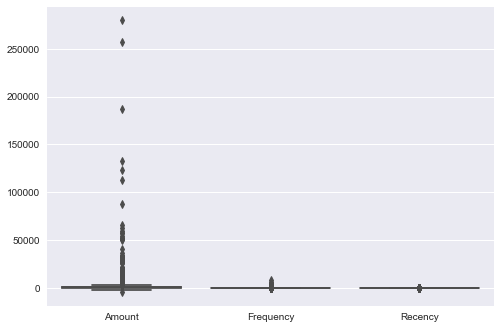

In [38]:
import seaborn as sns
ax= sns.boxplot(data = df_final[attributes])
ax

In [40]:
df_final.nunique().sum()

5143

In [41]:
df_final.shape

(4372, 3)

# Removing the outliers

In [44]:
Q1 = df_final.Amount.quantile(0.05)
Q3 = df_final.Amount.quantile(0.95)
IQR = Q3-Q1

df_final = df_final[(df_final.Amount >= Q1-1.5*IQR) & (df_final.Amount <= Q3+1.5*IQR)]

Q1 = df_final.Recency.quantile(0.05)
Q3 = df_final.Recency.quantile(0.95)
IQR = Q3-Q1

df_final = df_final[(df_final.Recency >=Q1-1.5*IQR) & (df_final.Recency <= Q3 + 1.5*IQR)]

Q1 = df_final.Frequency.quantile(0.05)
Q3 = df_final.Frequency.quantile(0.95)
IQR = Q3-Q1
df_final = df_final[(df_final.Frequency >= Q1-1.5*IQR) & (df_final.Frequency <= Q3+1.5*IQR)]


In [45]:
df_final.shape

(4280, 3)

In [46]:
df_final.head()

,Amount,Frequency,Recency
CustomerID,,,
12346.0,0.00,2,325
12347.0,4310.00,182,1
12348.0,1797.24,31,74
12349.0,1757.55,73,18
12350.0,334.40,17,309


# Scaling the data to get each column on a similar scale

In [48]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
df1 = scaler.fit_transform(df_final)
df1

array([[-0.75420839, -0.75881366,  2.29808706],
       [ 1.87724519,  1.07386616, -0.90867189],
       [ 0.34308944, -0.46354857, -0.18616138],
       ...,
       [-0.70486405, -0.70790588,  0.86296346],
       [-0.64638595, -0.64681656, -0.84928746],
       [ 0.3675357 , -0.06646795, -0.50287832]])

In [49]:
df_f = pd.DataFrame(df1)
df_f.columns = ['Amount','Frequency','Recency']
df_f.head()

,Amount,Frequency,Recency
0,-0.754208,-0.758814,2.298087
1,1.877245,1.073866,-0.908672
2,0.343089,-0.463549,-0.186161
3,0.318857,-0.035923,-0.740416
4,-0.550042,-0.606090,2.139729


# Performing K-Means Clustering

In [50]:
# defining the kmeans function with initialization as k-means++

kmeans = KMeans(n_clusters=2,init = 'k-means++')
kmeans.fit(df_f)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [51]:
#inertia on the fitted data
kmeans.inertia_

7576.6859318928955

# Checking the ideal number of clusters using a scree plot

In [54]:
# fitting multiple k-means algorithms and storing the values in an empty list

SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1,n_clusters = cluster,init='k-means++')
    kmeans.fit(df_f)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

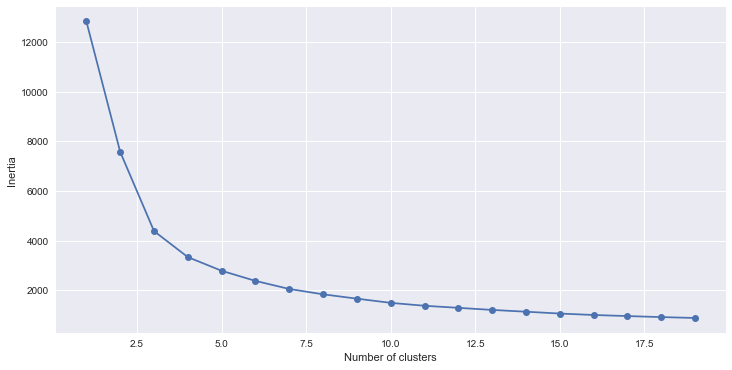

In [56]:
# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,20),'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [57]:
# k-means using 5 clusters and k-means++ initialization

kmeans = KMeans(n_jobs = -1, n_clusters = 4,init='k-means++')
kmeans.fit(df_f)
pred = kmeans.predict(df_f)

In [58]:
frame = pd.DataFrame(df_f)
frame['cluster'] = pred
frame['cluster'].value_counts()

3    2240
0    1035
1     779
2     226
Name: cluster, dtype: int64

In [59]:
df_final['Label'] = pred

In [60]:
df_final.head()

,Amount,Frequency,Recency,Label
CustomerID,,,,
12346.0,0.00,2,325,0
12347.0,4310.00,182,1,1
12348.0,1797.24,31,74,3
12349.0,1757.55,73,18,3
12350.0,334.40,17,309,0


In [61]:
df_segm_analysis = df_final.groupby(['Label']).mean()
df_segm_analysis

,Amount,Frequency,Recency
Label,,,
0,387.389256,25.542029,251.536232
1,2592.132196,161.214377,30.163030
2,6066.760177,362.814159,18.243363
3,667.760318,41.751339,48.778125


Cluster 0
- the lowest spending amount, lowest frequency and longest recency.
- non-frequent customer / normal customer/ least engaged customers

Cluster 1
- recency is quite near, amount is second high, fre is second high
- Seosanable customer / recent newest customers
- put your best foot forward, by sending them welcome offers, product-guides or relevant info to get them accustomzed to your brand and store.
- ** abit overlap with Cluster 3

Cluster 2
- highest amount, highest frequency,lowest recency 
- retail customer
- loyal customer 
- reward exclusive offers and special privileges

Cluster 3
- third highest spending, second lowest frequency,third recent buyers
- normal / standard customer / seasonable customer


# Plotting the various clusters taking 2 features at a time

In [76]:
df_final['Color'] = df_final['Label'].map({0:'#91FF61',
                                  1:'#BA61FF',
                                  2:'#0000FF',
                                  3:'#FF0000'})
df_final

,Amount,Frequency,Recency,Label,Color
CustomerID,,,,,
12346.0,0.00,2,325,0,#91FF61
12347.0,4310.00,182,1,1,#BA61FF
12348.0,1797.24,31,74,3,#FF0000
12349.0,1757.55,73,18,3,#FF0000
12350.0,334.40,17,309,0,#91FF61
...,...,...,...,...,...
18278.0,173.90,9,73,3,#FF0000
18280.0,180.60,10,277,0,#91FF61
18281.0,80.82,7,180,0,#91FF61


<AxesSubplot:xlabel='Amount', ylabel='Recency'>

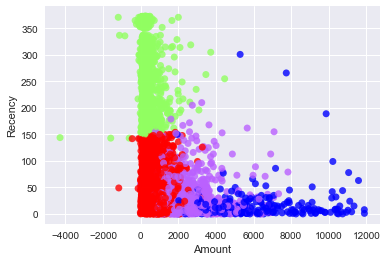

In [77]:
sns.regplot (df_final['Amount'],df_final['Recency'],fit_reg=False,scatter_kws={'facecolors':df_final['Color']}) #hue=df_final['Label'],palette = sns.color_palette('hls',4)

<AxesSubplot:xlabel='Amount', ylabel='Frequency'>

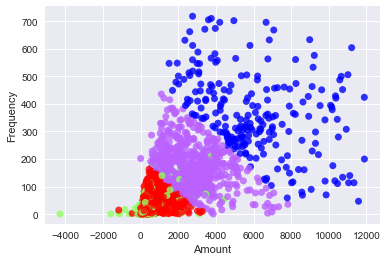

In [80]:
sns.regplot(df_final['Amount'],df_final['Frequency'],fit_reg=False,scatter_kws={'facecolors':df_final['Color']})

<AxesSubplot:xlabel='Frequency', ylabel='Recency'>

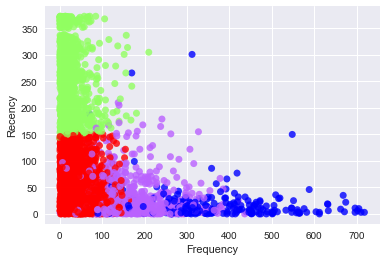

In [81]:
sns.regplot(df_final['Frequency'],df_final['Recency'],fit_reg=False,scatter_kws={'facecolors':df_final['Color']})

Frequency x Recency is very distinct`````

# Plotting Clusters taking all features at a time

<AxesSubplot:xlabel='Amount', ylabel='Frequency'>

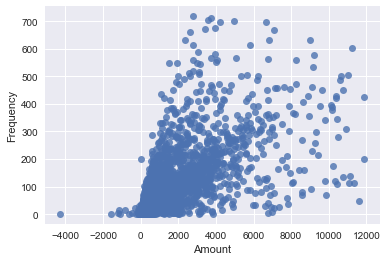

In [85]:
sns.regplot(df_final['Amount'],df_final['Frequency'],df_final['Recency'],fit_reg=False)